# Fysikklab 4107 våren 2022.

importerer nyttige bibliotek

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline


Vi lager en array som inneholder x-koordinatene til festepunktene. Horisontal avstand mellom festepunktene er 0.200 m.

In [3]:
h = 0.200
xfast = np.asarray([0, h, 2*h, 3*h, 4*h, 5*h, 6*h, 7*h])


Start, slutt og steglengde i x-rettning:

In [4]:
xmin = 0.000
xmax = 1.401
dx = 0.001


Vi genererer en array med høydekoordinatene til festepunktene. 

In [5]:
yfast = np.asarray([0.27, 0.221, 0.25, 0.24, 0.19, 0.162, 0.154, 0.16])
inttan = np.diff(yfast)/h


# Når programmet her har avsluttet while-løkka, betyr det at
# tallverdiene i tabellen yfast vil resultere i en tilfredsstillende bane.


Programmet beregner deretter 7 tredjegradspolynomer, et for hvert intervall mellom to nabofestepunkter. Med scipy.interpolate-funksjonen CubicSpline:

In [6]:
cs = CubicSpline(xfast, yfast, bc_type='natural')

xmin = 0.000
xmax = 1.401
dx = 0.001


Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eventuelt for mange horisontale posisjoner lagret i en tabell: <br>
`cs(x)`   tilsvarer $y(x)$<br>
`cs(x,1)` tilsvarer $y'(x)$<br>
`cs(x,2)` tilsvarer $y''(x)$<br>

<br>
Vi vil ha en tetter diskretisering av x og y. Her lager vi en tabell med x-verdier mellom 0 og 1.4 m

In [7]:
x = np.arange(xmin, xmax, dx)


Funksjonen arange returnerer verdier på det "halvåpne" intervallet
`[xmin,xmax)`, dvs slik at xmin er med mens xmax ikke er med. Her blir
dermed `x[0]=xmin=0.000`, `x[1]=xmin+1*dx=0.001`, ..., `x[1400]=xmax-dx=1.400`, 
dvs x blir en tabell med 1401 elementer
<br>

<par> Vi lager arrays for $y$, $y'$ og $y''$ -- også med 1401 elementer. </par>

In [8]:
Nx = len(x)
y = cs(x)  # y=tabell med 1401 verdier for y(x)
dy = cs(x, 1)  # dy=tabell med 1401 verdier for y'(x)
d2y = cs(x, 2)  # d2y=tabell med 1401 verdier for y''(x)


Nå kan vi plotte baneformen $y(x)$

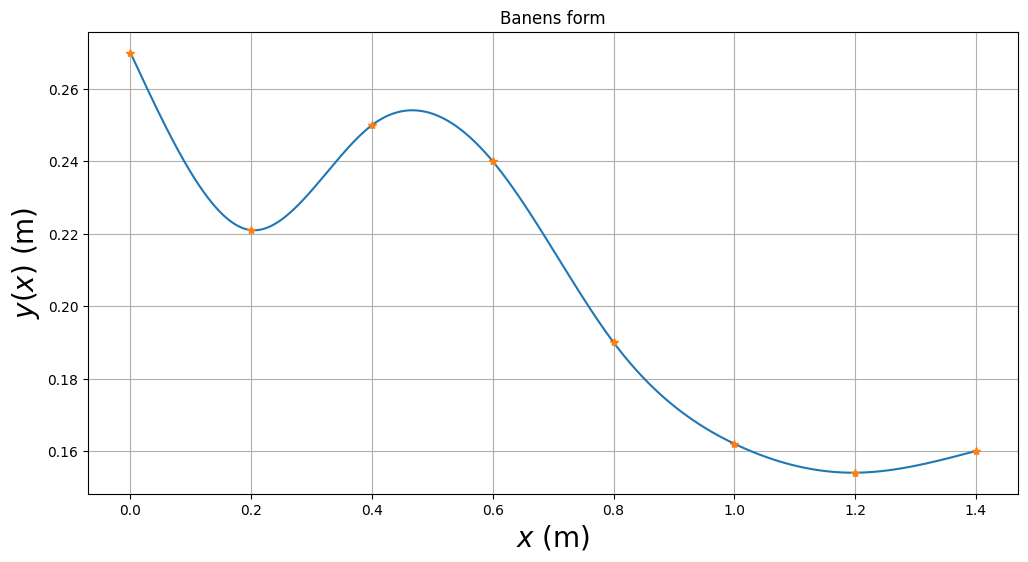

In [9]:
baneform = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, y, xfast, yfast, '*')
plt.title('Banens form')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$y(x)$ (m)', fontsize=20)
plt.grid()
plt.show()


Denne koden kan nå utvides til å regne ut flere interessante størelser =) 

In [10]:
# treghetsmomentet
c = 2/5
M = 0.031
R = 0.011
treghetmoment = c*M*R*R


In [11]:
# fart
def v():
    return np.sqrt((2*9.81*(y[0]-y)/1+c))


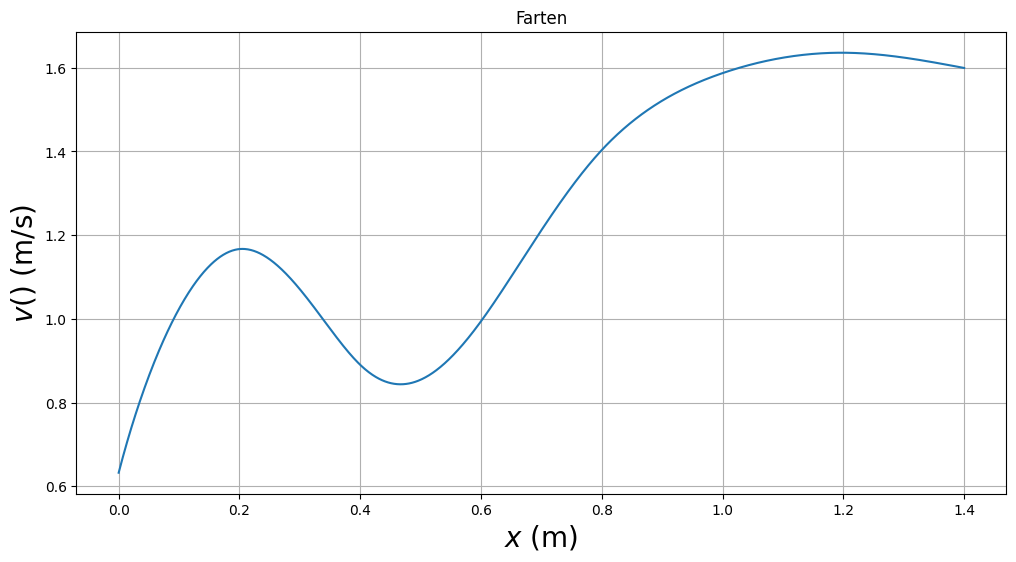

In [12]:
fart = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, v())
plt.title('Farten')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$v()$ (m/s)', fontsize=20)
plt.grid()
plt.show()


In [13]:
# hellningsvinkel
def betha():
    return np.arctan(dy)


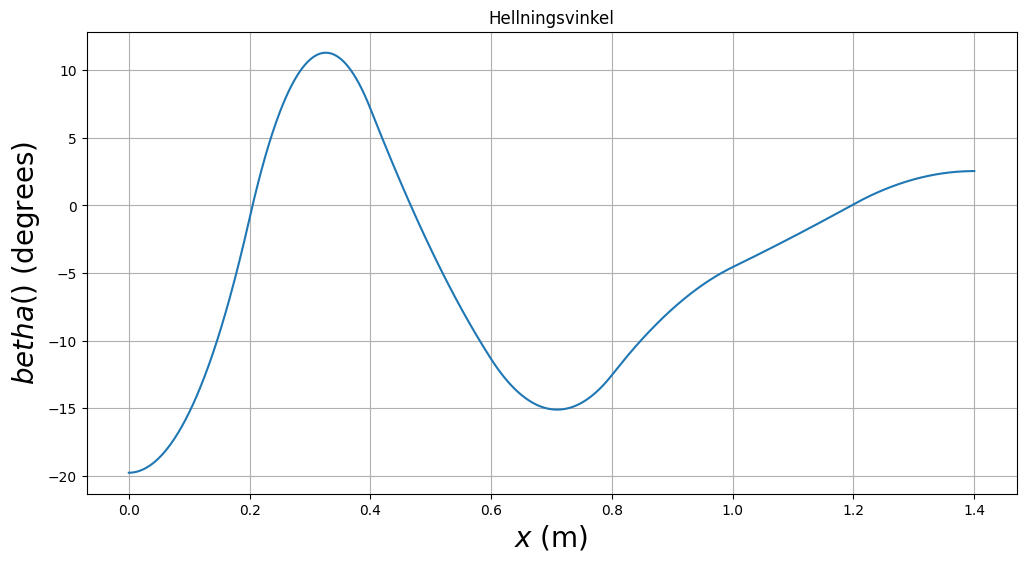

In [14]:
beta = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, betha()*180/np.pi)
plt.title('Hellningsvinkel')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$betha()$ (degrees)', fontsize=20)
plt.grid()
plt.show()


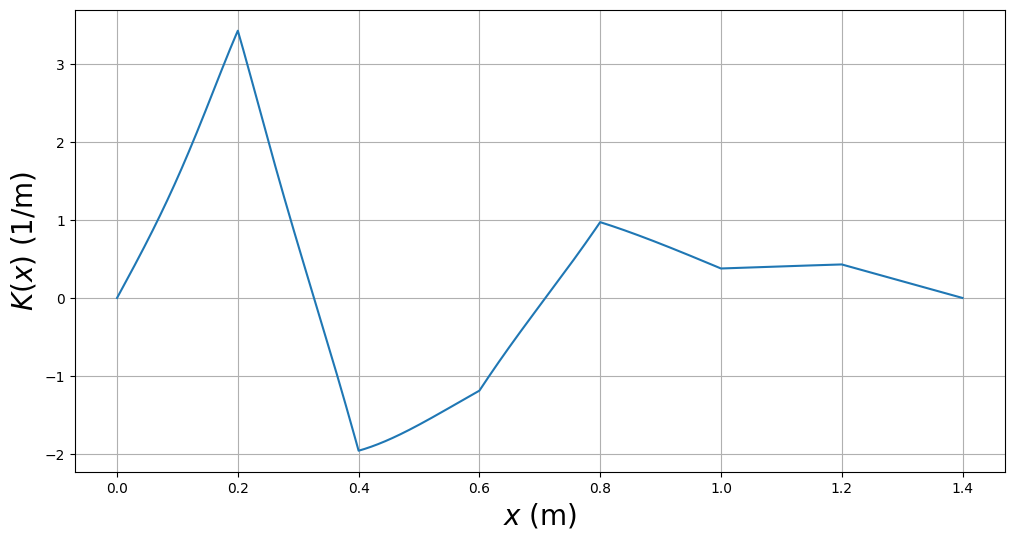

In [15]:
# sentripetalakselerasjon
def k(x):
    return d2y/(1+dy*dy)**(3/2)


def a(x):
    return v()**2 * k(x)

# normalkraft


def N(x):
    return M*(9.81*np.cos(betha())+a(x))


K = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, k(x))
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$K(x)$ (1/m)', fontsize=20)
plt.grid()
plt.show()


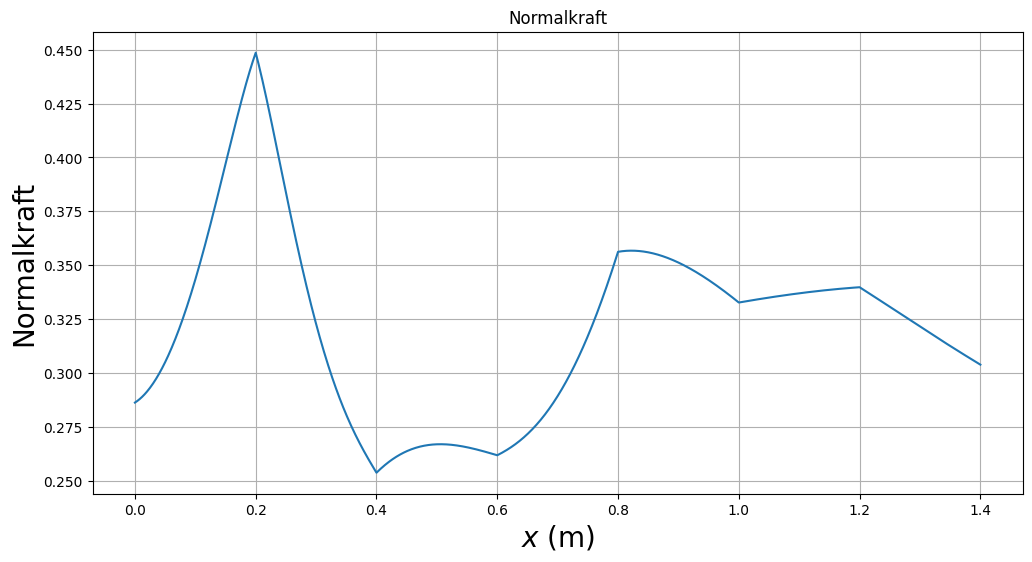

In [16]:
normalkraft = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, N(x))
plt.title('Normalkraft')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('Normalkraft', fontsize=20)
plt.grid()
plt.show()


In [17]:
# friksjon

def friksjon(x):
    return (c*M*9.81*np.sin(betha()))/(1+c)


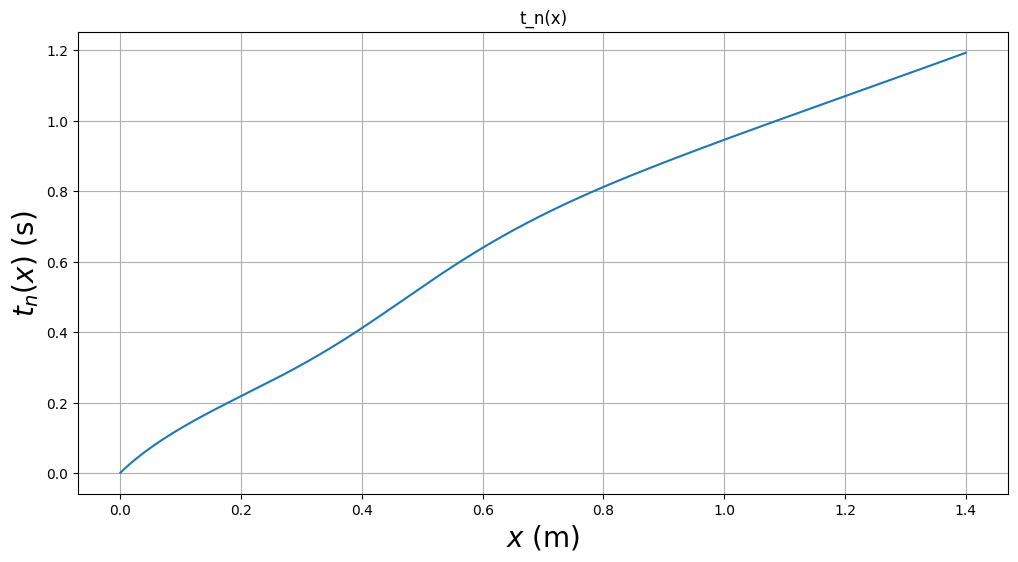

In [18]:

def v_xn():
    return v()*np.cos(betha())


def average_v_xn(n):
    return 1/2 * (v_xn()[n]+v_xn()[n-1])



def delta_tn(n):
    return dx/average_v_xn(n)


def t(n):
    result = 0
    for i in range(1, n):
        result += delta_tn(i)
    return result


def t_n(n):
    summe = 0
    summ = []
    for i in range(Nx):
        summe += delta_tn(i)
        summ.append(summe)
    return summ
        

plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, t_n(x))
plt.title('t_n(x)')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$t_n(x)$ (s)', fontsize=20)
plt.grid()
plt.show()


In [19]:
# # Hastighet som funksjon av tiden

# plt.plot(summed_t(x), v())
# plt.xlabel('$t$ (s)', fontsize=12)
# plt.ylabel('$v$ (m/s)', fontsize=20)
# plt.grid()

# plt.show()


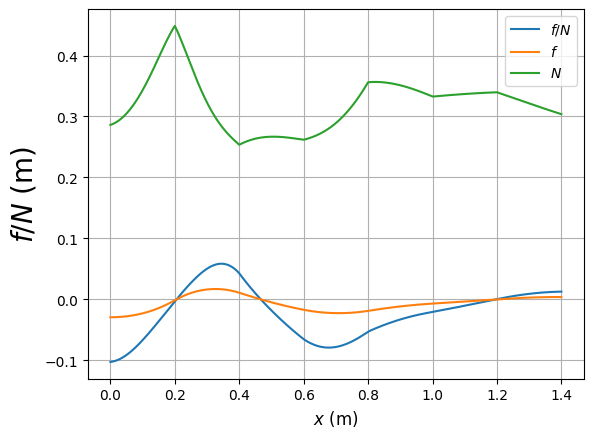

In [20]:
# Forholdet mellom friksjonskraften f og normalkraften N

plt.plot(x, friksjon(x)/N(x))

plt.plot(x, friksjon(x))
plt.plot(x, N(x))

plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$f/N$ (m)', fontsize=20)
plt.grid()
plt.legend(['$f/N$', '$f$', '$N$'])


plt.show()


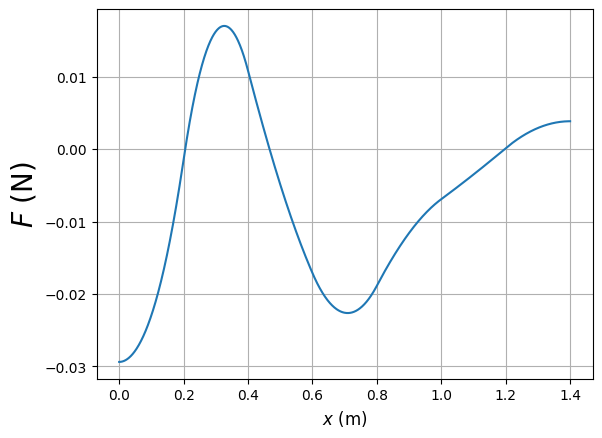

In [21]:
# Friksjonskraft graf
plt.plot(x, friksjon(x))
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$F$ (N)', fontsize=20)
plt.grid()


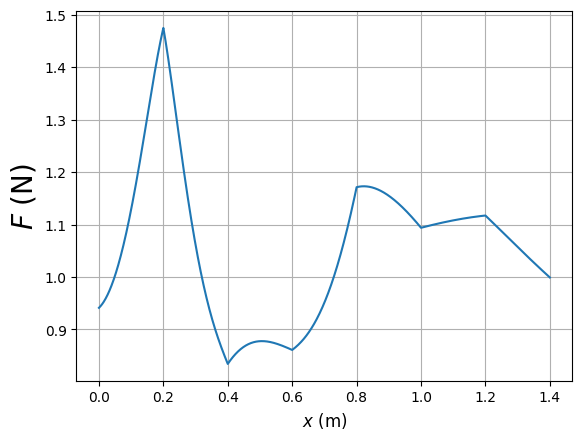

In [22]:
# N/Mg, normalkraft i forhold til G

plt.plot(x, N(x)/(M*9.81))
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$F$ (N)', fontsize=20)
plt.grid()

plt.show()
